# Identifying Optimal Markets for Advertising E-Learning Products

In this project, our goal is to identify the most promising markets for an e-learning company specializing in online courses in web development, mobile development, data science, and other subjects. The company aims to maximize its advertising investment by targeting markets with the highest potential for customer conversion.

Through this analysis, we will recommend two to three optimal markets for the company to allocate its advertising resources. Specifically, we will address the following questions to assist in the decision-making process:

* Which markets are best for advertising the company's courses in terms of the number of valuable customers and their willingness to pay the $59 monthly subscription fee?
* What demographic insights can be drawn from the best markets to enable targeted advertising to specific demographic groups?


## Selecting the Right Dataset for Our Analysis
One possible approach would be to conduct our own survey to gather relevant user data tailored to our specific needs. However, given the limited time and resources available for this marketing initiative, this option is not feasible.

After exploring various alternatives, we found a dataset that closely aligns with our requirements: a survey conducted by the e-learning company FreeCodeCamp. With a large following of over 40,000, the 2017 survey attracted a substantial number of responses (20,282) from new coders (with less than 5 years of experience). This survey provides valuable insights into the coders' job interests, fields of work, learning resources, income, and more. The goal was to understand their interests, learning methods, demographics, and socioeconomic backgrounds. Further details about the survey can be found on their [website](https://www.freecodecamp.org/news/we-asked-15-000-people-who-they-are-and-how-theyre-learning-to-code-4104e29b2781#.5mxwnyk80). The dataset is also available for download from their public [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master?tab=readme-ov-file).

The survey provides two raw datasets:

* *2017-new-coder-survey-part-1.csv* - The first half of the survey, completed by 100% of respondents.
* *2017-new-coder-survey-part-2.csv* - The entire survey, including both parts one and two, completed by 95% of respondents.

For our analysis, we will work with the second dataset, which includes both parts of the survey. We will clean and prepare the raw data to fit our analysis needs.

### Refining Our Objectives

To guide our analysis effectively, we will refine our objectives with specific criteria tailored to our goals:

1. **Geographical Distribution:** Where are these new coders located?
2. **Subscription Willingness:** Will they be willing to pay for the $59/mo subscription fee?
3. **Interest Alignment:** Does their interest align with the products and services offered by the client, specifically in web development, mobile development, and data science courses?
4. **Language Consideration:** What is the official language spoken, considering all courses offered are in English?
5. **Learning Habits and Demographics:** Insights into learning habits and demographic information.

Given the extensive nature of the survey with over 100 columns, we will focus on loading only the most relevant columns essential for addressing our research questions and deriving actionable insights efficiently.

In [97]:
# Config option to print all interactive output in a cell
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [98]:
import pandas as pd

# Define the columns to import from the dataset
columns_to_import = [
    '#', # Respondent ID
    'How old are you?',
    "What's your gender?",
    'Which country are you a citizen of?',
    'Which country do you currently live in?',
    'Which language do you you speak at home with your family?',
    'About how much money did you make last year (in US dollars)?',
    'jobs_interested_in',
    'months_learning',
    'total_spent_learning',
    'learning_resources',
    'attend_bootcamp',
    'which_bootcamp',
    'Regarding employment status, are you currently...',
    'Which field do you work in?'
]

# Read the specified columns from the dataset
survey_responses = pd.read_csv('./datasets/2017-new-coder-survey-part-2.csv', dtype='object')[columns_to_import]

# Display the first 3 and last 3 rows of the dataset for initial inspection
survey_responses.head(3)
survey_responses.tail(3)

,#,How old are you?,What's your gender?,Which country are you a citizen of?,Which country do you currently live in?,Which language do you you speak at home with your family?,About how much money did you make last year (in US dollars)?,jobs_interested_in,months_learning,total_spent_learning,learning_resources,attend_bootcamp,which_bootcamp,"Regarding employment status, are you currently...",Which field do you work in?
0,21db37adb60cdcafadfa7dca1b13b6b1,34,male,United States of America,United States of America,English,NaN,Full-Stack Web Developer,6,80,"Codecademy, Stack Overflow, W3Schools, CSS Tri...",No,NaN,Not working but looking for work,NaN
1,e0b92236ac53b58f079231e014748dc3,26,male,Brazil,Brazil,Portuguese,15000,NaN,48,0,"freeCodeCamp, Udacity, Khan Academy, EdX, Mozi...",No,NaN,Employed for wages,software development and IT
2,21ba173828fbe9e27ccebaf4d5166a55,21,male,United States of America,United States of America,Spanish,13000,"Front-End Web Developer, Back-End Web Develo...",5,1000,"Udemy, Codecademy, CSS Tricks, freeCodeCamp, M...",No,NaN,Employed for wages,software development and IT


,#,How old are you?,What's your gender?,Which country are you a citizen of?,Which country do you currently live in?,Which language do you you speak at home with your family?,About how much money did you make last year (in US dollars)?,jobs_interested_in,months_learning,total_spent_learning,learning_resources,attend_bootcamp,which_bootcamp,"Regarding employment status, are you currently...",Which field do you work in?
18884,c0d0b88bc2b76087232bfa0327457b04,24,female,India,India,Malayalam,NaN,NaN,23,0,"Code Wars, EdX, Udacity, freeCodeCamp, Codecad...",No,NaN,Employed for wages,software development and IT
18885,52c24e8c43bb044e1b3e1df39a5c4b9b,21,male,Italy,Italy,Italian,NaN,"User Experience Designer, Data Scientist, ...",18,0,"Stack Overflow, freeCodeCamp",No,NaN,Not working but looking for work,NaN
18886,7b6a092fef05254d9d6c7ba565e8d3f0,NaN,male,Ghana,Ghana,English,NaN,NaN,24,0,"W3Schools, Stack Overflow, Khan Academy, Codec...",No,NaN,NaN,NaN


In [3]:
# Display column information
survey_responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18887 entries, 0 to 18886
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   #                                                             18887 non-null  object
 1   How old are you?                                              18443 non-null  object
 2   What's your gender?                                           18544 non-null  object
 3   Which country are you a citizen of?                           18444 non-null  object
 4   Which country do you currently live in?                       18392 non-null  object
 5   Which language do you you speak at home with your family?     18400 non-null  object
 6   About how much money did you make last year (in US dollars)?  9546 non-null   object
 7   jobs_interested_in                                            8591 non-null 

**Initial Observations:**

* There are 18,886 entries and 15 columns.
* There are no empty rows (no null IDs), but certain columns have null values. This is handled in the cleaning stage on as needed basis. We also remove any null values in `jobs_interested_in`. The reasoning is explained further in the report.
* The column names are long and difficult to understand. We'll standardize the column names to easily understandable names.
* Initially all types were object in import. Although this matches the data types for most columns, some will be corrected.

## Examining Sample Representativity of Population

Before analyzing the sample data, it is crucial to determine whether the sample is representative for our  target population. Specifically, we need to ensure that the data includes the appropriate categories of respondents that meet out analysis needs, such as coders likely to purchase courses in *web development, mobile development, and data science*.

**The Job of Interest Variable:**

The variable `jobs_interested_in` should serve as a good indicator of the respondent's interest and whether there is sufficient alignment to consider the sample representative of our potential customers.

We start by examining the frequency distribution table of the jobs people are interested in.

In [4]:
# Count the occurrences of each job of interest and calculate the percentage of each job relative to the total count
jobs_interest_count = survey_responses['jobs_interested_in'].value_counts(normalize=True, dropna=False) * 100

# Update name to the series for clarity
jobs_interest_count.name = 'Job Interest Count'

jobs_interest_count

jobs_interested_in
NaN                                                                                                                                                                                                                                           54.513687
Full-Stack Web Developer                                                                                                                                                                                                                       5.199343
  Front-End Web Developer                                                                                                                                                                                                                      2.885583
  Data Scientist                                                                                                                                                                                                                             

Athough the information is quite granular and difficult to assess, here are some key points we noted:
* 55% of the responses were `NaN`, indicating that more than half of the respondents didn't have or specify a clear job of interest.
* Among the stand-alone choices, *Full-Stack Web Developer* was the most frequent response. accounting for 5% of the total.

Since jobs_interested_in is a key variable for identifying our target audience for marketing advertisements, we will temporarily remove the `NaN` values to check for representativity.

In [5]:
# Filter out NaN values from the 'jobs_interested_in' column using boolean indexing and store the non-null values in a new series
interests_non_null = survey_responses['jobs_interested_in'].dropna()

# Generate the frequency distribution table without null values
interests_non_null.value_counts(normalize=True, dropna=False) * 100

# Print the count of non-null job interests
print('Non-null Job Interest Count:', interests_non_null.count())

jobs_interested_in
Full-Stack Web Developer                                                                                                                                                                                                                      11.430567
  Front-End Web Developer                                                                                                                                                                                                                      6.343848
  Data Scientist                                                                                                                                                                                                                               2.293097
Back-End Web Developer                                                                                                                                                                                                                       

Non-null Job Interest Count: 8591


**Visualizing Frequency Distribution of Job Interests**

In this section, we aim to visualize the distribution of the number of job interests expressed by survey respondents. This exploration will provide insights into the diversity of interests among our target audience and inform our company's marketing strategies accordingly.

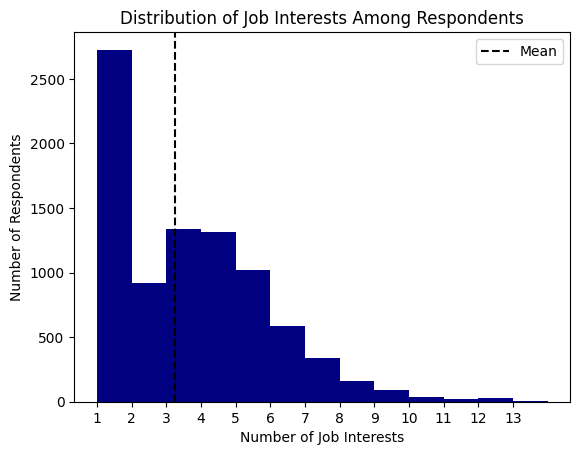

In [113]:
import matplotlib.pyplot as plt
from numpy import arange

# Ensure inline plotting in Jupyter notebooks
%matplotlib inline

# Split the multi-course responses into an array of interests
split_interests_col = interests_non_null.str.split(',')

# Calculate the number of interests for each respondent
number_of_interests = split_interests_col.str.len()

# Plot the frequency distribution of the number of interests of individual respondents
number_of_interests.plot.hist(bins=range(1, 15), label='', color='navy') # edgecolor='black'

# Set the title and labels of the plot
plt.title('Distribution of Job Interests Among Respondents')
plt.xlabel('Number of Job Interests')
plt.xticks(arange(1, 14, 1))  # Set the x-ticks from 1 to 13 with a step of 1
plt.ylabel('Number of Respondents')
plt.axvline(number_of_interests.mean(), color='black', label='Mean', linestyle='--')
plt.legend()

plt.show();

In [114]:
# Display key statistics
number_of_interests.describe()

count    8591.000000
mean        3.254569
std         2.173827
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        13.000000
Name: jobs_interested_in, dtype: float64

The right-skewed histogram shows that the bulk of the distribution lies at the left extreme. This indicates that the majority of people have only a few areas of interest related to their career endeavor.

**Focusing Analysis on Main Courses Offered:**

While having more interests could potentially lead to selling more courses, it might also mean that the interests would be too divergent to be valuable when our goal is to target a specific set of courses.

To refine our analysis and align it with our advertising objectives, we will narrow our focus to the main courses offered by our company: Web Development, Mobile Development, and Data Science. 

In [8]:
# Create a boolean Series for jobs that align with the main courses offered
main_interests_bool = interests_non_null.str.lower().str.contains('web developer|mobile developer|data scientist')

# Generate frequency and proportional distribution, applying formatting
main_count = main_interests_bool.value_counts().apply(lambda x: f"{x:,}") # Apply thousand separater format
main_proportion = (main_interests_bool.value_counts(normalize=True) * 100).apply(lambda x: f"{x: .2f}%") # Apply percentage format

# Create a DataFrame with the formatted counts and proportions
frequency_table = pd.DataFrame(data={'Count': main_count, 'Proportion (%)': main_proportion})

# Update the name of the index
frequency_table.index.name = 'Interested in Main Courses'

frequency_table

,Count,Proportion (%)
Interested in Main Courses,,
True,"7,800",90.79%
False,791,9.21%


**Observations:**

Out of 8,591 respondents who specified at least one job of interest, **25%** of them had a very specific interest in just one job. A significant **75%** of the respondents had five or fewer job interests.

While varied interests could potentially translate into more business opportunities by selling more courses and retaining customers, it is noteworthy that **91%** of the survey respondents were interested in at least one of the main courses offered by the company, i.e., Web Development, Mobile Development, and Data Science.

Given this, the data appears representative, with 91% of the respondents showing interest in one of the most popular courses offered by the company.

## Clean and Prepare Data for Analysis
To clean and prepare the data for analysis, we'll perform the following steps:

1. **Standardize Column Names:** Rename columns to be more understandable and consistent.
2. **Replace Bad Data and Correct Data Types:** Change the data types of columns that were incorrectly imported as object types to the types appropriate for analysis.
3. **Remove Unspecified Job Interests:** Exclude records where the job interest is unspecified, as these will not be valuable for our analysis.

**Standardize Column Names**

Below, we're using a Python `dict` to map the existing column names to the desired column names. For standardization, we will use *CamelCase* with the first letter capitalized.

In [115]:
# List the current column names
survey_responses.columns

Index(['#', 'How old are you?', 'What's your gender?',
       'Which country are you a citizen of?',
       'Which country do you currently live in?',
       'Which language do you you speak at home with your family?',
       'About how much money did you make last year (in US dollars)?',
       'jobs_interested_in', 'months_learning', 'total_spent_learning',
       'learning_resources', 'attend_bootcamp', 'which_bootcamp',
       'Regarding employment status, are you currently...',
       'Which field do you work in?'],
      dtype='object')

In [10]:
# Create a list containing the standardized column names in CamelCase
simplified_names = ['Id', 'Age', 'Gender', 'CountryCitizen', 'CountryLive', 'Language', 'IncomePrevYear', 'JobRoleInterest', 'MonthsProgramming', 'MoneyForLearning', 'LearningResources', 'AttendedBootcamp', 'BootcampAttended', 'EmploymentStatus', 'JobField']

# Create an empty dictionary to store the mapping of current to desired column names
column_mapping = {}

# Map the current column names to the desired column names using a loop
for i, j in zip(survey_responses.columns, simplified_names):
    column_mapping[i] = j

# Update the column names in the DataFrame using the column mapping
survey_responses.rename(columns=column_mapping, inplace=True)

# Display the updated column names to confirm the changes
survey_responses.columns

Index(['Id', 'Age', 'Gender', 'CountryCitizen', 'CountryLive', 'Language',
       'IncomePrevYear', 'JobRoleInterest', 'MonthsProgramming',
       'MoneyForLearning', 'LearningResources', 'AttendedBootcamp',
       'BootcampAttended', 'EmploymentStatus', 'JobField'],
      dtype='object')

As a recap, we have:
* columns that describe a demographic attribute or status (e.g., 'Age', 'Gender', 'CountryCitizen', 'EmploymentStatus')
* columns related to job or learning aspects (e.g., 'JobRoleInterest', 'MonthsProgramming', 'MoneyForLearning', 'LearningResources', 'AttendedBootcamp').

**2. Replace Bad Data and Correct Data Types**

Initially, all data types were inported as objects. We might want to change some of them so it better represents the data and provided for an accurate calculation during analysis. - It makes sense to remove convert age, population, income related columns, money for learning, months programming to int as we plan on performing calculations with some of these columns later.

In [11]:
# 
cols_to_update = ['Age', 'MonthsProgramming', 'MoneyForLearning']

survey_responses[cols_to_update].dtypes

Age                  object
MonthsProgramming    object
MoneyForLearning     object
dtype: object

In [12]:
# Convert the 'Age' column to float
survey_responses['Age'] = survey_responses['Age'].astype(float)

The remaining columns contain erroneous data. To rectify the issue, the following function is used to replace the bad characters.

In [13]:
# Function to clean up a column by replacing bad characters with specified replacements
def cleanBadData(column, *args):
    """
    Clean up a column by replacing specified bad characters with their replacements.

    Args:
        column (str or pd.Series): The column to clean.
        *args (list of tuple): Variable-length argument list containing tuples of bad character replacements.

    Returns:
        str or pd.Series: The cleaned column.
    """
    # Extract the list of bad character replacements from *args
    bad_chars_replacements = args[0]

    # Iterate through each bad character replacement pair
    for bad_char in bad_chars_replacements:
        # Replace the bad character with its replacement in the column
        column = column.replace(bad_char[0], bad_char[1])

    return column



In [14]:
# Define characters and substrings that may cause type conversion issues
bad_chars_replacements = [
    ('xxxxx', '0'),          # Replace 'xxxxx' with '0'
    ('approx $', ''),        # Remove 'approx $'
    (' -- on books', ''),    # Remove ' -- on books'
    ('$', ''),               # Remove '$'
    ('k', '000'),            # Replace 'k' with '000'
    ('free courses', '0'),   # Replace 'free courses' with '0'
    (',', ''),               # Remove commas
    (' months', ''),         # Remove ' months'
    (' mont', '')            # Remove ' mont'
]


# Convert 'MonthsProgramming' column to string type and drop rows containing 'code camp'
survey_responses['MonthsProgramming'] = survey_responses['MonthsProgramming'].astype(str)
survey_responses = survey_responses[~survey_responses['MonthsProgramming'].str.contains('code camp')]

# Clean 'MonthsProgramming' column and convert to a float
survey_responses['MonthsProgramming'] = survey_responses['MonthsProgramming'].apply(cleanBadData, args=(bad_chars_replacements,))
survey_responses['MonthsProgramming'] = survey_responses['MonthsProgramming'].astype(float)
survey_responses['MonthsProgramming'].dtype


dtype('float64')

In [15]:
# Clean 'MoneyForLearning' column and convert to a float
survey_responses['MoneyForLearning'] = survey_responses['MoneyForLearning'].astype(str)
survey_responses['MoneyForLearning'] = survey_responses['MoneyForLearning'].apply(cleanBadData, args=(bad_chars_replacements,))
survey_responses['MoneyForLearning'] = survey_responses['MoneyForLearning'].astype(float)

survey_responses['MoneyForLearning'].dtype

dtype('float64')

**3. Remove Unspecified Job Interests**

Given our focus on participants interested in the offered courses, we will exclude rows where participants have not specified their job interests. Without this information, we cannot accurately determine their interests, making it a better choice to omit these entries from our analysis.

In [16]:
# Drop rows where JobsInterestedIn is null
survey_responses = survey_responses[survey_responses['JobRoleInterest'].notnull()]

survey_responses['JobRoleInterest'].value_counts(dropna=False, normalize=True) * 100

JobRoleInterest
Full-Stack Web Developer                                                                                                                                                                                                                      11.431898
  Front-End Web Developer                                                                                                                                                                                                                      6.344587
  Data Scientist                                                                                                                                                                                                                               2.293364
Back-End Web Developer                                                                                                                                                                                                                         2

## Analysis: Finding the Best Market

**Objectives:**
1. **Geographical Distribution**: Determine the locations of new coders and identify the regions with the highest concentration of new coders.
3. **Learning Investment**: Assess the amount of money new coders are willing to invest in learning.
4. **Demographic-based Advertisement**: Explore demographic factors such as gender, age, student vs. full-time worker status, and preferred learning schedule for targeted advertising campaigns.

By addressing these objectives and considering additional factors, we can gain valuable insights into the new coder population and tailor our strategies effectively.

### 1. Identifying New Coder Density by Geographical Location

The dataset offers geographical data through two variables:
- The `CountryCitizen` variable denotes the participants' country of origin.
- The `CountryLive` variable indicates the country where participants currently reside, which may differ from their origin country.

For our analysis, we prioritize the `CountryLive` variable as it reflects the participants' current location, aligning with our advertising focus.

Considering that the dataset provides information at the country level, we treat each country as an individual market. Our objective is to identify two to three optimal countries for advertising. A key metric for assessing market potential is the number of potential customers. In this context, a larger number of potential customers in a market signifies greater opportunity. For instance, achieving a 10% conversion rate among 5,000 potential customers in Market A surpasses converting 100% of the 30 potential customers in Market B.

In [17]:
# Tabular frequency table for the top 10 countries of location
top_10_countries = survey_responses['CountryLive'].value_counts()[:10]
top_10_countries

CountryLive
United States of America    3806
India                        684
United Kingdom               387
Canada                       327
Germany                      159
Brazil                       158
Poland                       158
Australia                    147
Russia                       112
Nigeria                      109
Name: count, dtype: int64

While the table provides a granular view of the population, we'll visualize the distribution of new coders across different countries in a bar plot, providing a clear picture of the density of new coders in each country for comparison.

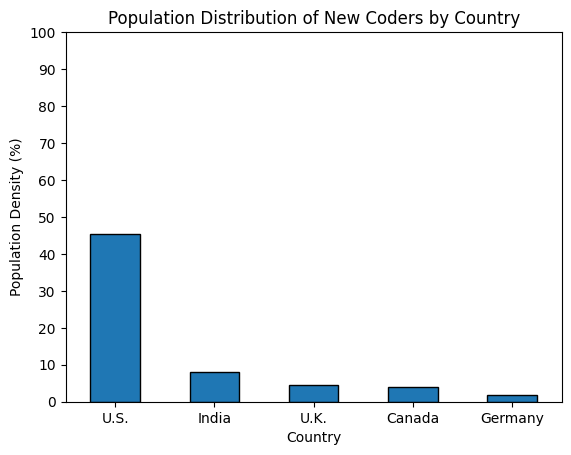

In [18]:
# Top 4 countries by population
top_5_countries = round(survey_responses['CountryLive'].value_counts(normalize=True) * 100, 2)[:5]

# Visualize the population distribution of new coders by country
barplot = top_5_countries.plot.bar(edgecolor='black', rot=0)

plt.title('Population Distribution of New Coders by Country')
plt.xlabel('Country')
plt.xticks([0, 1, 2, 3, 4], ['U.S.', 'India', 'U.K.', 'Canada', 'Germany'])
plt.ylabel('Population Density (%)')
plt.yticks(arange(0, 101, 10))

# plt.bar_label(barplot, labels=top_5_countries.values)
plt.show();

In [19]:
top_5_countries

CountryLive
United States of America    45.31
India                        8.14
United Kingdom               4.61
Canada                       3.89
Germany                      1.89
Name: proportion, dtype: float64

Our analysis reveals that the U.S. exhibits the highest density of new coders, comprising 45% of the total population. India follows with 8.14%, and the United Kingdom ranks third with 4.61%. At this point, we'll drop Germany as a consideration for the best market option and only look at the top 4 countries by new coders density.

### Narrowing Down to Main Courses of Interest:

To further refine our analysis, we delve into the countries with the highest concentration of coders interested in web development, mobile development, and data science. Leveraging the main_interests_bool variable previously utilized to assess sample representativity, we'll examine the distribution of coder interests across these key areas. By focusing on these primary courses, we aim to pinpoint geographical regions with significant interest in our core offerings, paving the way for targeted marketing strategies.

In [20]:
# Filter the dataset to focus on respondents interested in the main courses offered
main_interests_bool = survey_responses['JobRoleInterest'].str.lower().str.contains('web developer|mobile developer|data scientist')

# Calculate the distribution of these respondents by the top 4 countries.
top_countries_main_interests = round(survey_responses.loc[main_interests_bool, 'CountryLive'].value_counts(normalize=True) * 100, 2)[:4]

top_countries_main_interests

CountryLive
United States of America    45.05
India                        8.05
United Kingdom               4.73
Canada                       3.88
Name: proportion, dtype: float64

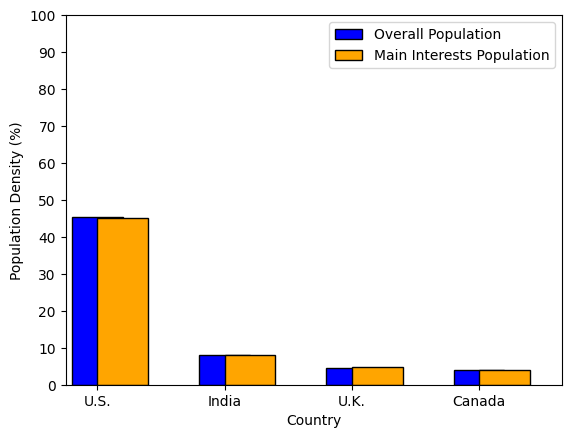

In [21]:
# Plotting the bar chart for overall population density
overall_population = top_5_countries
overall_plot = overall_population.plot.bar(edgecolor='black', color='blue', align='center', width=0.4, label='Overall Population', rot=0)

# Plotting the bar chart for main interests population density
main_interests_population = top_countries_main_interests
main_interests_plot = main_interests_population.plot.bar(edgecolor='black', color='orange', align='edge', width=0.4, label='Main Interests Population', rot=0)

plt.xlabel('Country')
plt.ylabel('Population Density (%)')
plt.yticks(range(0, 101, 10))
plt.xticks([0, 1, 2, 3], ['U.S.', 'India', 'U.K.', 'Canada'])
plt.legend()
plt.show();


Thus, the population density among coders interested in any topics versus those interested in our main course offerings is remarkably similar. This alignment is expected, considering that coders interested in one or more of our main courses constitute 91% of the total responses.

### Willingness to Spend on Learning

To further our analysis, we will examine the amount of money new coders are willing to spend on learning. Understanding this will help us avoid advertising in markets where most people prefer free resources, which is unlikely to be profitable for us.

The MoneyForLearning column captures the amount of money participants have spent on learning from when they started coding until they completed the survey. Given that our company sells subscriptions at $59 per month, it's crucial to understand how much each student is willing to spend per month.

Additionally, it makes sense to focus our analysis on four countries: the US, India, the United Kingdom, and Canada. This decision is based on two factors:

* These countries have the highest absolute frequencies in our sample, ensuring we have a substantial amount of data for each.
* Our courses are in English, and English is an official language in all four countries. The higher the number of English speakers, the better our chances of effectively targeting the right audience with our ads.

By narrowing our analysis to these key markets, we can better tailor our marketing strategies to the financial behaviors and preferences of potential customers.

In [68]:
# Create a copy of the survey_responses DataFrame to avoid modifying the original data
learning_one_plus_month = survey_responses.copy()

# Replace any zero values in 'MonthsProgramming' with one to avoid division by zero errors
learning_one_plus_month['MonthsProgramming'] = learning_one_plus_month['MonthsProgramming'].replace(0, 1)

# Calculate the amount spent per month
learning_one_plus_month['SpentPerMonth'] = round(learning_one_plus_month['MoneyForLearning'] / learning_one_plus_month['MonthsProgramming'])

# Display the frequency distribution of the 'SpentPerMonth' column applying format and rounding
frequency_spending = (learning_one_plus_month['SpentPerMonth'].value_counts(dropna=False, normalize=True) * 100).apply(lambda x: f"{x: .2f}%")

frequency_spending


SpentPerMonth
0.0         42.47%
NaN         14.14%
8.0          1.79%
50.0         1.77%
100.0        1.68%
            ...   
3167.0       0.01%
240.0        0.01%
10833.0      0.01%
8667.0       0.01%
2600.0       0.01%
Name: proportion, Length: 298, dtype: object

There are a significant number (14.14%) of NaN values present, which we'll remove to ensure our analysis is based on complete data. Additionally, we'll focus on data from the four countries with the most new coders: the US, India, the United Kingdom, and Canada.

In [95]:
# Create a boolean mask for rows where 'CountryLive' contains one of the four countries of interest
countries_bool = learning_one_plus_month['CountryLive'].str.contains('India|United States of America|Canada|United Kingdom')

# Filter the DataFrame to include only rows with non-null 'SpentPerMonth' values and matching countries
learning_one_plus_month = learning_one_plus_month[learning_one_plus_month['SpentPerMonth'].notnull() & countries_bool]

# Display the frequency distribution of the 'SpentPerMonth' column after filtering
intervals = pd.interval_range(start=0, end=2600, freq=58)
learning_one_plus_month['SpentPerMonth'].value_counts(dropna=False, bins=intervals)

(0, 58]         1430
(58, 116]        288
(116, 174]       133
(174, 232]        71
(232, 290]        55
(290, 348]        47
(464, 522]        40
(348, 406]        31
(406, 464]        23
(580, 638]        23
(986, 1044]       22
(638, 696]        21
(1624, 1682]      18
(812, 870]        18
(1972, 2030]      15
(1450, 1508]      12
(1218, 1276]      12
(2494, 2552]       9
(696, 754]         7
(754, 812]         7
(1276, 1334]       6
(1160, 1218]       6
(928, 986]         6
(870, 928]         6
(2320, 2378]       6
(1392, 1450]       6
(1044, 1102]       4
(522, 580]         3
(1740, 1798]       3
(1102, 1160]       3
(2204, 2262]       3
(1566, 1624]       2
(2378, 2436]       2
(2146, 2204]       2
(2030, 2088]       2
(1798, 1856]       2
(1682, 1740]       1
(1508, 1566]       0
(2088, 2146]       0
(1914, 1972]       0
(1856, 1914]       0
(2262, 2320]       0
(1334, 1392]       0
(2436, 2494]       0
Name: count, dtype: int64

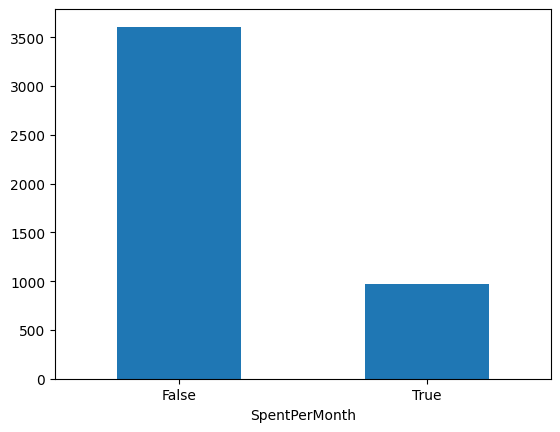

In [72]:
subs_willingness = (learning_one_plus_month['SpentPerMonth'] >= 59)

subs_willingness.value_counts().plot.bar(rot=0);

In [73]:
# Group by country
country_avergae_spending = learning_one_plus_month.pivot_table(values='SpentPerMonth', index='CountryLive', aggfunc='mean')

country_avergae_spending.sort_values(by='SpentPerMonth', ascending=False)



,SpentPerMonth
CountryLive,
United States of America,216.863086
Canada,126.474048
India,120.350877
United Kingdom,66.563636


Among the four English-speaking countries where most of the participants reside in, the U.S. coders have the hightest amount willing to spend on learning, followed by Canada and India ranking second and third. Why U.K is so low? Outliers?

 The results for the United Kingdom and Canada are surprisingly low relative to the 
values we see for India. If we considered a few socio-economical metrics 
(like 
GDP per capita), we'd intuitively expect people in the UK and Canada to 
spend more on learning than people in India.
 It might be that we don't have have enough representative data for the United 
Kingdom, Canada, and India, or we have some outliers (maybe coming from 
wrong survey answers) making the mean too big for India, or too low for the UK 
and Canada. Or it might be that the results are correct

### Determining the Presence of Outliers

We'll generate a `boxplot` for each of the four country to compare the distribution of money spent on learning. This will allow us to spot outliers that may potentially be affecting the average.


In [ ]:
import seaborn as sns

# Generate a boxplot for distribution comparision
sns.boxplot(data=learning_one_plus_month, x='CountryLive', y='SpentPerMonth')
plt.title('Distribution Comparision between Money Spent Per Month')

plt.show();# Try the themes and customizations for graphs?

It is quite difficult to adjurn whether anything is wrong with the data for U.K, Canada, and India. However, we can see that there are two extreme number in the data for the U.S. Although, we don't know if this is an outlier for sure, it seems quite unlikely. Also, this is not the majority of the bulk of distribution. Since, our focus is converting as many coders as possible to our product, we'll ignore these tw values.

In [ ]:
# Get rid of potential outlier
learning_one_plus_month = learning_one_plus_month[learning_one_plus_month['SpentPerMonth'] < 20000]

country_avergae_spending = learning_one_plus_month.pivot_table(values='SpentPerMonth', index='CountryLive', aggfunc='mean')

country_avergae_spending.sort_values(by='SpentPerMonth', ascending=False)

Mean still looks off. We'll continue to investigate for extreme outliers.

In [ ]:
# Plot a barplot

sns.boxplot(data=learning_one_plus_month, x='CountryLive', y='SpentPerMonth')

plt.show();

Potential outliers in India: Values above 2500. There could be other factors involved such as attending bootcamps, which are relatively expensive, or months learning, and number of learning resources.

### Investigate Outliers Factors

In [ ]:
# Isolate the outliers in India

india_outliers_bool = (learning_one_plus_month['CountryLive'] == 'India') & (learning_one_plus_month['SpentPerMonth'] >= 2500)

india_outliers = learning_one_plus_month[india_outliers_bool]

india_outliers[['SpentPerMonth', 'MoneyForLearning', 'MonthsProgramming', 'LearningResources', 'AttendedBootcamp', 'BootcampAttended']]

None attended any bootcamps. The coder who spent the highest 100000.0 has been coding for more months, but that doesn;t mean any one coding more necessarily is willing to spend more.

In [ ]:
learning_one_plus_month.plot.scatter(y='MonthsProgramming', x='SpentPerMonth')

plt.show();

learning_one_plus_month['MonthsProgramming'].corr(learning_one_plus_month['SpentPerMonth'])

In [ ]:
# Count of learning resources consulted
learning_res = india_outliers['LearningResources'].str.split(',').str.len()

money_spent = india_outliers['SpentPerMonth']

pd.DataFrame(data={'Money Spent Per Month': money_spent, 'Resources Used': learning_res}
             )


# india_outliers['SpentPerMonth'].corr(india_outliers['learning_res'])

In [ ]:
# Remove them
learning_one_plus_month = learning_one_plus_month[~india_outliers_bool]

# Create a function since this is used a lot
country_avergae_spending = learning_one_plus_month.pivot_table(values='SpentPerMonth', index='CountryLive', aggfunc='mean')

country_avergae_spending.sort_values(by='SpentPerMonth', ascending=False)



Looking back at the box plot above, we can also see more extreme outliers for the US (values over $6000 per month). Let's examine these participants in more detail.

In [ ]:
us_outliers_bool = (learning_one_plus_month['CountryLive'] == 'United States of America') & (learning_one_plus_month['SpentPerMonth'] >= 6000)

us_outliers = learning_one_plus_month[us_outliers_bool]

us_outliers[['SpentPerMonth', 'MoneyForLearning', 'MonthsProgramming', 'LearningResources', 'AttendedBootcamp', 'BootcampAttended']]

In [ ]:
# Remove us outliers
outliers_to_remove = (us_outliers_bool) & (learning_one_plus_month['AttendedBootcamp'] == 'No')

learning_one_plus_month = learning_one_plus_month[~outliers_to_remove]

country_avergae_spending = learning_one_plus_month.pivot_table(values='SpentPerMonth', index='CountryLive', aggfunc='mean')

country_avergae_spending.sort_values(by='SpentPerMonth', ascending=False)

Canada:

In [ ]:
canada_outliers_bool = (learning_one_plus_month['CountryLive'] == 'Canada') & (learning_one_plus_month['SpentPerMonth'] >= 3500)

canada_outliers = learning_one_plus_month[canada_outliers_bool]

canada_outliers[['SpentPerMonth', 'MoneyForLearning', 'MonthsProgramming', 'LearningResources', 'AttendedBootcamp', 'BootcampAttended']]

Won't remove.

### Finding 2nd Best Market to Advertise in

Definately U.S. because of the number of new coders and therefore potential customers and the amount they are willing to pay.

Another market - Consider # of potential customers in other countries. We have almost twice as more potential customers in India than we have in Canada:

In [ ]:
learning_one_plus_month['CountryLive'].value_counts(normalize=True) * 100

One average, coders in India are willing to pay more that the company's monthly susbcription of $59 and they make up 12% of the customer base compared to the top 4. 
So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

The data suggests strongly that we shouldn't advertise in the UK (both lower customers and lower spent).

Canada (high spending will) is suprisinging has low number of coders (only 6%) and is lowest among the 4 country. Maybe doesn't make sense to advertise here

In [ ]:
# Makes sens to split unequally - weighted
top_three_choices = learning_one_plus_month.loc[(learning_one_plus_month['CountryLive'] == 'Canada') | (learning_one_plus_month['CountryLive'] == 'India') | (learning_one_plus_month['CountryLive'] == 'United States of America'),'CountryLive'].value_counts(normalize=True)*100

top_three_choices.plot.pie()

top_three_choices

In [ ]:
top_three_choices = learning_one_plus_month[(learning_one_plus_month['CountryLive'] == 'Canada') | (learning_one_plus_month['CountryLive'] == 'India') | (learning_one_plus_month['CountryLive'] == 'United States of America')]

top_three_choices['CountryLive'].value_counts()

84% in Us and 14% in india?

Within the country choosen, identify the following for targetted advertisements:

Demographics based advertisement: gender, age, language spoken (narrow search by?), student vs full-time workers schedule based/self-paced.

## Targetted Advertisement based on Country Demographics

- Age
- Gender
- Student vs Full-time

In [ ]:
# Age
top_three_choices['Age'].value_counts(bins=5)[:3]

In [ ]:
intervals = pd.interval_range(start=15, end=60, freq=5)
spending_will = top_three_choices['SpentPerMonth'] >= 59

top_three_choices.loc[spending_will, 'Age'].value_counts(bins=intervals)

In [ ]:
# Gender
top_three_choices['Gender'].value_counts(normalize=True) * 100

In [ ]:
top_three_choices.loc[spending_will, 'Gender'].value_counts(normalize=True)[:2] * 100

In [ ]:
# Employment
top_three_choices.loc[spending_will, 'EmploymentStatus'].value_counts(normalize=True)[:2] * 100


In [ ]:
top_three_choices.loc[spending_will, 'JobField'].value_counts(normalize=True)[:1] * 100


Probably focus on advanced concepts rather than basics.